In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/KDT_Natural_Language

/content/drive/MyDrive/Colab Notebooks/KDT_Natural_Language


# 13th mini project
---
- dataset: fake news, true news


## [1] 데이터 로딩 & 전처리
---

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

In [5]:
df_fake = pd.read_csv("../data/Fake.csv")
df_true = pd.read_csv("../data/True.csv")

In [6]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [7]:
print(f'Fake news shape: {df_fake.shape}')
print(f'True news shape: {df_true.shape}')

Fake news shape: (23481, 4)
True news shape: (21417, 4)


In [8]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
df_fake.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [10]:
 df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [11]:
df_true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [12]:
# target 열 생성
df_true['label']=1
df_fake['label']=0

In [13]:
# 데이터프레임 합치기
df_news = pd.concat([df_fake, df_true], axis =0 )

In [14]:
# 불필요한 컬럼 제거
df_news = df_news.drop(['title','subject','date'], axis = 1)

In [15]:
df_news.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [16]:
# 결측치 확인
df_news.isnull().sum()

text     0
label    0
dtype: int64

In [17]:
# 중복 데이터 체크 및 삭제
df_news.duplicated().sum()

6251

In [18]:
# 형태 확인
df_news.shape

(44898, 2)

In [19]:
# 데이터프레임 행 섞기
df_news = df_news.sample(frac=1).reset_index(drop=True)
df_news.head()

,text,label
0,"We are devout Catholics, but my daughter goes ...",0
1,Donald Trump s approval rating continues to pl...,0
2,US paratrooper on security duty during a miss...,0
3,VIENNA (Reuters) - Munich prosecutors said on ...,1
4,A big slap in the face to an overreaching gove...,0


In [20]:
# data, target 나누기
data = df_news["text"]
target = df_news["label"]

print(data.shape, target.shape)

(44898,) (44898,)


## [2] 텍스트 분류
---
- 토큰화
- 불용어 처리
- 정규식(영어로만 이루어진 단어)
- 소문자 변환
- 표제어 추출
- 문장 형태로 복원

In [21]:
# 텍스트 전처리 함수 
stop_words = set(stopwords.words('english')) 

def LemmSentence(sentence):
    lemma_words = []
    wordnet_lemmatizer = WordNetLemmatizer()

    # 토큰화
    word_tokens = word_tokenize(sentence) 
    for word in word_tokens: 
        
        # 불용어 처리
        if word not in stop_words: 
            # 알파벳조합을 제외한 모든 문자 제거
            new_word = re.sub('[^a-zA-Z]', '',word)
            # 소문자로 변환
            new_word = new_word.lower()
            # 표제어 추출
            new_word = wordnet_lemmatizer.lemmatize(new_word)
            lemma_words.append(new_word)
    
    # 단어 -> 문장으로 복원
    return " ".join(lemma_words)

data = [LemmSentence(i) for i in data]

In [22]:
data[:5]

['we devout catholic  daughter go lutheran college  she messaged day tell group student parked outside school cafeteria display literature defending planned parenthood  needle say  disappointed decision college allow group activist promote abortion christian based college  when christian church stop defending sanctity life  truly doomed society  a catholic school kingston  ontario  hosted anticatholic abortion activist earlier week healthy relationshipssexuality retreat  told senior student acceptable girl send naked photo boyfriend long consent  the presentation mandatory grade  student  one father say school gave detail event advanceactivist julie lalonde    sits board canada leading abortion lobby organization  abortion right coalition canada   helped found anticatholic group the radical handmaid goal combatting prolife motion introduced house common time  during demonstration  activist dress mockery catholic nun  wearing cornette  trademark butterfly headpiece formerly worn st vinc

In [23]:
# 텍스트 수치화
def transformText(data):
  tokenizer = Tokenizer(num_words= 300) # num_words 
  tokenizer.fit_on_texts(data)
  seq_data = tokenizer.texts_to_sequences(data)
  
  # 사전 단어 총개수
  voca_word_num = len(tokenizer.word_index)
  return(seq_data,voca_word_num)

seq_data,voca_word_num = transformText(data)



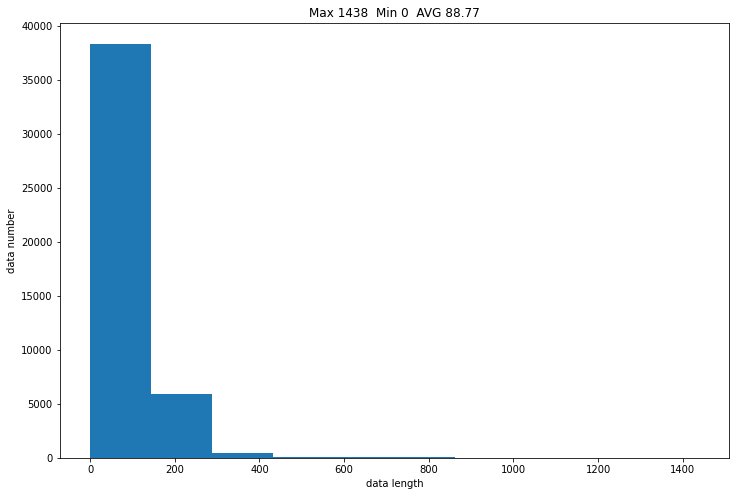

In [24]:
# 단어 갯수 파악 함수
def checkLength(datas):

  # 기사 개당 단어 개수
  length=[len(data) for data in datas]
  
  # 히스토그램
  plt.figure(figsize=(12,8))
  plt.hist(length)
  plt.title(f'Max {max(length)}  Min {min(length)}  AVG {round(sum(length)/len(length),2)}')
  plt.xlabel('data length')
  plt.ylabel('data number')
  plt.show()
# return length
  
checkLength(seq_data)    

In [25]:
# 패딩 설정:150 
pad_length = 150
pad_data = pad_sequences(seq_data, maxlen= pad_length)

In [26]:
# 원핫인코딩
oh_data = to_categorical(pad_data)

In [37]:
# train, test 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(oh_data, target, random_state = 42)
print(f'x_train.shape:{x_train.shape}, y_train.shape:{y_train.shape} ') 
print(f'x_test.shape:{x_test.shape}, y_test.shape:{y_test.shape}')

x_train.shape:(33673, 150, 300), y_train.shape:(33673,) 
x_test.shape:(11225, 150, 300), y_test.shape:(11225,)


## [3] 모델 생성
---


In [38]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [39]:
EMB_DIM = 32                     # 임베딩 벡터 크기 
WORD_NUM = voca_word_num         # 단어사전 수
HIDDEN_NODE = 10                 # 은닉층 뉴런 수
INPUT_LENGH = pad_length         # 1문장의 토큰 수

In [45]:
print(INPUT_LENGH,voca_word_num )

150 190036


In [51]:
model = Sequential() #EMB_DIM
model.add(Embedding(WORD_NUM,EMB_DIM, input_length=INPUT_LENGH))
model.add(SimpleRNN(HIDDEN_NODE))
model.add(Dense(2, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 32)           6081152   
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 10)                430       
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
Total params: 6,081,604
Trainable params: 6,081,604
Non-trainable params: 0
_________________________________________________________________


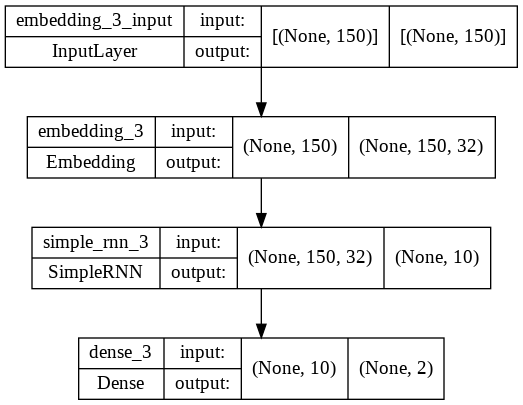

In [52]:
plot_model(model, show_shapes=True)

In [53]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [ ]:
history = model.fit(x_train,
                    y_train, 
                    epochs=1, 
                    batch_size=64, 
                    validation_split= 0.2)

In [48]:
# 학습 히스토리 시각화
epochs = range(1, len(history.history['acc']) + 1)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()



NameError: ignored